In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("C:\\Users\zhong\Desktop\workspace/python/house_price/train.csv")
test_data = pd.read_csv("C:\\Users\zhong\Desktop\workspace/python/house_price/test.csv")

In [3]:
all_data = train_data.append(test_data,ignore_index=True)

c:\users\zhong\desktop\python\2.环境\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [4]:
train_data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

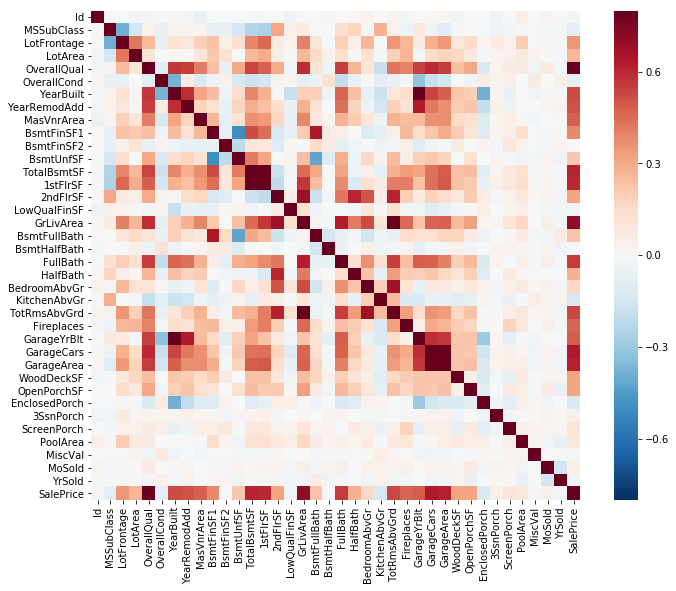

In [6]:
'''
欧洲购房思维与国内不同，对数据初步观察分析效果不好。所以利用热力图观察各标签相关性，再对相关性较高的标签进行具体分析
'''
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,vmin=-.8,cmap="RdBu_r",square=True)

In [7]:
'''
上图显示，与SalePrice相关性较高的标签按序排列为：
1(OverallQual,GrLivArea)
2(TotalBsmtSF,1stFlrSF,GarageCars,GarageArea)
3(FullBath,TotRmsAbvGrd,YearBuilt)
其中，TotalBsmtSF与1stFlrSF，GarageCars与GarageArea表现出较强的多重共线性，各挑选一个标签进行分析。
'''
#首先观察目标标签SalePrice情况
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

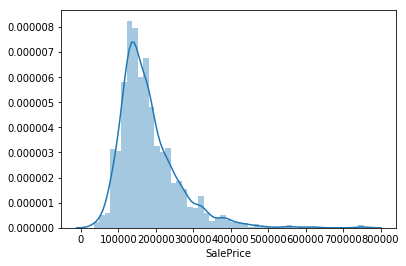

In [8]:
sns.distplot(train_data['SalePrice'])

In [9]:
#观察OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)
'''
基本与预想的一样，品质越好的房子房价自然越高

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-091f331f8665>, line 4)

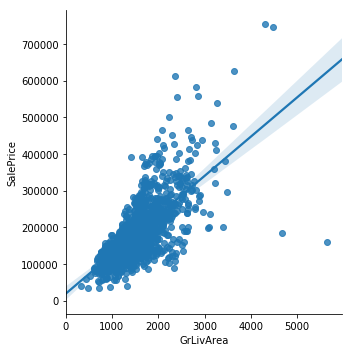

In [11]:
#观察GrLivArea
sns.lmplot(x='GrLivArea', y='SalePrice', data=train_data, fit_reg=True, scatter=True)

#有较强的指数关系

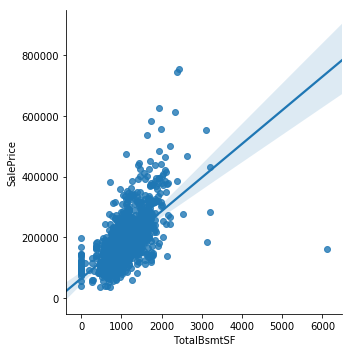

In [37]:
#观察TotalBsmtSF
sns.lmplot(x='TotalBsmtSF', y='SalePrice', data=train_data, fit_reg=True, scatter=True)

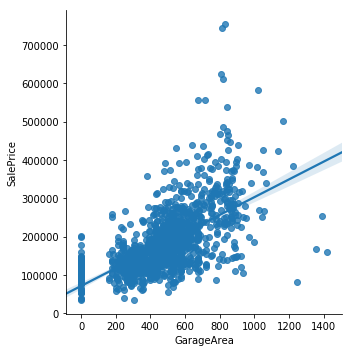

In [38]:
#观察GarageArea
sns.lmplot(x='GarageArea', y='SalePrice', data=train_data, fit_reg=True, scatter=True)

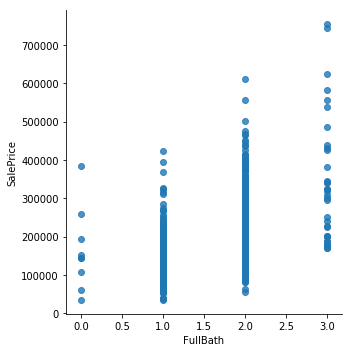

In [40]:
#观察FullBath
sns.lmplot(x='FullBath', y='SalePrice', data=train_data, fit_reg=False, scatter=True)

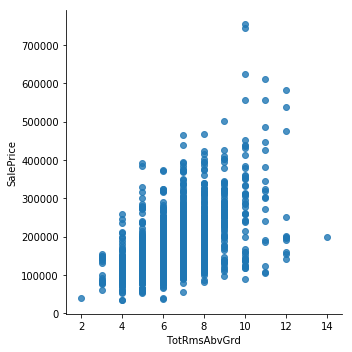

In [41]:
#观察TotRmsAbvGrd
sns.lmplot(x='TotRmsAbvGrd', y='SalePrice', data=train_data, fit_reg=False, scatter=True)

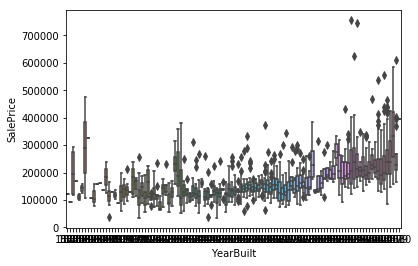

In [44]:
#观察YearBuilt
sns.boxplot(x='YearBuilt', y='SalePrice', data=train_data)
'''
线性关系不明显

In [12]:
#缺失值统计 
null_data=all_data.isnull().sum()
null_data[null_data>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

In [13]:
pd.set_option('max_columns',81)
all_data[all_data['Utilities'].isnull()]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1915,810,0,0,NaN,1,1Fam,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseA,0,Fa,Fa,Wd Sdng,Wd Sdng,NaN,NaN,0,CBlock,1,Min1,280.0,1.0,TA,Unf,TA,Detchd,1975.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,109.0,Reg,0,30,NaN,0.0,None,NaN,0,3,IDOTRR,24,4,2,N,0,NaN,CompShg,Gable,Normal,NaN,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
1945,1474,0,0,NaN,3,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1632.0,Y,Feedr,Norm,FuseA,144,TA,TA,BrkFace,BrkFace,NaN,Gd,2,CBlock,1,Min2,495.0,2.0,TA,Unf,TA,Attchd,1952.0,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,NaN,IR1,0,20,RL,0.0,None,Shed,750,5,Gilbert,0,2,6,Y,0,NaN,CompShg,Hip,Normal,NaN,WD,0,Pave,7,1632.0,NaN,0,1952,1952,2008


In [14]:
#缺失值补充，补充方式详见‘标签描述.xlsx’
all_data['MSZoning']=all_data.groupby(['MSSubClass','Neighborhood'])['MSZoning'].transform(lambda x: x.fillna(x.mode()))
all_data['LotFrontage']=all_data.groupby(['LotArea','Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

c:\users\zhong\desktop\python\2.环境\lib\site-packages\numpy\lib\nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [15]:
all_data['Utilities']=all_data.groupby(['MSSubClass','Neighborhood','OverallQual'])['Utilities'].transform(lambda x: x.fillna(x.mode()))
all_data['Electrical']=all_data.groupby(['MSSubClass','Neighborhood','OverallQual'])['Electrical'].transform(lambda x: x.fillna(x.mode()))
all_data['Functional']=all_data.groupby(['OverallQual'])['Functional'].transform(lambda x: x.fillna(x.mode()))

In [16]:
#离散变量赋值
all_data.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

#参考房价均值排序赋值


SalePrice                
                     mean    median count
MSSubClass                               
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          239948.501672  215200.0   299
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [18]:
class MSSubClassTransform(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        MSSubClass_map={
             180:1,
             30:2,45:2,
             190:3,50:3,90:3,
             85:4,40:4,160:4,
             70:5,20:5,75:5, 80:5,150:5,
             120:6,60:6
                        }
        return X.apply(lambda x:x.map(MSSubClass_map))

In [20]:
from sklearn.pipeline import Pipeline
MSS_pipeline = Pipeline([
        ('select_obj', DataFrameSelector(['MSSubClass'])),
        ('transform', MSSubClassTransform()),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [21]:
MSS_pipeline.fit_transform(train_data)

c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

In [22]:
none_pipeline = Pipeline([
        ('select_obj', DataFrameSelector(['Alley','MasVnrType','GarageType','MiscFeature'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value='none')),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [23]:
other_pipeline = Pipeline([
        ('select_obj', DataFrameSelector(['Exterior1st','Exterior2nd'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value='other')),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [24]:
cat_pipeline = Pipeline([
        ('select_obj', DataFrameSelector(['SaleType','Street','LotShape','LandContour','LotConfig','Condition1','Condition2','Neighborhood','BldgType','HouseStyle','RoofStyle','RoofMatl','Foundation','Heating','CentralAir','PavedDrive','SaleCondition'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value='Oth')),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

In [25]:
time_pipeline = Pipeline([
        ('select_num', DataFrameSelector(['GarageYrBlt','MoSold','YrSold','YearBuilt','YearRemodAdd'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value=2050)),
    ])

In [26]:
class QualLevelTransform(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Quallevel_map={
                                                     'GLQ':6,
                       'Ex':5,                       'ALQ':5,
                       'Gd':4,'Reg':4,               'BLQ':4,'GdPrv':4,
                       'TA':3,'IR1':3,'Gtl':3,'Av':3,'Rec':3,'MnPrv':3,'Fin':3,
                       'Fa':2,'IR2':2,'Mod':2,'Mn':2,'LwQ':2,'GdWo':2, 'RFn':2,
                       'Po':1,'IR3':1,'Sev':1,'No':1,'Unf':1,'MnWw':1
                        }
        return X.apply(lambda x:x.map( Quallevel_map))

In [27]:

QualLevel_pipeline = Pipeline([
        ('select_num', DataFrameSelector(['LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageFinish','GarageQual','GarageCond','PoolQC','Fence'])),
        ('transform', QualLevelTransform()),
        ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ])

In [28]:
num_pipeline = Pipeline([
        ('select_num', DataFrameSelector(['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','LotArea','OverallQual','OverallCond','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ])

In [29]:
#添加特征
all_data['AllArea']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']+all_data['GarageArea']+all_data['OpenPorchSF']+all_data['EnclosedPorch']+all_data['3SsnPorch']+all_data['ScreenPorch']
all_data['AllQual']=all_data['AllArea']*all_data['OverallQual']
#all_data['AllCond']=all_data['AllArea']*all_data['OverallCond']
#all_data['AllBsmQual']=all_data['TotalBsmtSF']*all_data['BsmtQual']
#all_data['AllBsmCond']=all_data['TotalBsmtSF']*all_data['BsmtCond']
#all_data['AllGarQual']=all_data['GarageArea']*all_data['GarageQual']
#all_data['AllGarCond']=all_data['GarageArea']*all_data['GarageCond']
all_data['AllBath']=all_data['BsmtFullBath']+all_data['BsmtHalfBath']+all_data['FullBath']+all_data['HalfBath']
all_data['AllBathQual']=all_data['AllBath']*all_data['OverallQual']
all_data['AllBathCond']=all_data['AllBath']*all_data['OverallCond']

In [30]:
import_pipeline = Pipeline([
        ('select_num', DataFrameSelector(['AllArea','AllQual','AllBath','AllBathQual','AllBathCond'])),
        ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ])

In [31]:
preprocess_pipeline = FeatureUnion(transformer_list=[
        ('MSS_pipeline', MSS_pipeline),
        ('none_pipeline', none_pipeline),
        ('other_pipeline', other_pipeline),
        ('cat_pipeline', cat_pipeline),
        ('time_pipeline', time_pipeline),
        ('QualLevel_pipeline', QualLevel_pipeline),
        ('num_pipeline', num_pipeline),
        ('import_pipeline', import_pipeline),
    ])

In [32]:
X_all=preprocess_pipeline.fit_transform(all_data)

c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [114]:
#降维
from sklearn.decomposition import PCA
pca=PCA(n_components=40)
X_reduced=pca.fit_transform(X_all)

In [115]:
X_train = X_reduced[:1460,:]
X_test=X_reduced[1460:,:]
y_train = train_data['SalePrice']

In [116]:
X_train

array([[ 1.57259213e+03, -2.44597185e+03, -2.33488699e+02, ...,
         2.17054617e-01, -3.81239564e-01,  7.76653068e-02],
       [-2.03861386e+03,  1.79843378e+02,  6.40820807e+02, ...,
        -9.43069033e-02,  1.20425221e+00,  1.03150687e-02],
       [ 3.77178957e+03, -2.91659104e+02, -4.35889170e+02, ...,
         5.91130389e-02, -4.47236854e-01, -5.36246407e-01],
       ...,
       [ 5.97375671e+03, -3.48688339e+03,  3.64965688e+02, ...,
        -3.67074843e-01, -2.14781451e-01, -1.26697938e-01],
       [-7.05437184e+03,  2.22500112e+03,  2.64352823e+02, ...,
        -2.39128208e+00,  1.24729316e-01, -2.31876649e-02],
       [-5.29732302e+03,  1.79460967e+03,  6.27587644e+02, ...,
        -1.04025575e-02, -2.37691462e-01,  2.25570259e-01]])

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge

la_model=Lasso()
ri_model=Ridge()
el_model=ElasticNet()
ke_model=KernelRidge()
ba_model=BayesianRidge()
#网格搜索参数
param_grid={
    'alpha': [0.05,0.03,0.01],
    'max_iter':[10000],
    'l1_ratio':[0.005,0.001,0.0001],
   # 'kernel':['polynomial'],
   # 'degree':[1] ,
    #'coef0':[1.8,1.7,1.6,1.5]
         }
grid_search = GridSearchCV(el_model,param_grid,cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train,y_train)
print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))
grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])


c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective di

{'alpha': 0.05, 'l1_ratio': 0.0001, 'max_iter': 10000} 36135.34698636988
                                              params  mean_test_score  \
0  {'alpha': 0.05, 'l1_ratio': 0.005, 'max_iter':...     36135.496434   
1  {'alpha': 0.05, 'l1_ratio': 0.001, 'max_iter':...     36135.374374   
2  {'alpha': 0.05, 'l1_ratio': 0.0001, 'max_iter'...     36135.346986   
3  {'alpha': 0.03, 'l1_ratio': 0.005, 'max_iter':...     36150.719952   
4  {'alpha': 0.03, 'l1_ratio': 0.001, 'max_iter':...     36150.608143   
5  {'alpha': 0.03, 'l1_ratio': 0.0001, 'max_iter'...     36150.583023   
6  {'alpha': 0.01, 'l1_ratio': 0.005, 'max_iter':...     36173.395781   
7  {'alpha': 0.01, 'l1_ratio': 0.001, 'max_iter':...     36173.341120   
8  {'alpha': 0.01, 'l1_ratio': 0.0001, 'max_iter'...     36173.328827   

   std_test_score  
0    7.533269e+08  
1    7.533384e+08  
2    7.533409e+08  
3    7.520989e+08  
4    7.521069e+08  
5    7.521087e+08  
6    7.506708e+08  
7    7.506739e+08  
8    7.506746e+0

c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\zhong\desktop\python\2.环境\lib\site-packages\sklearn\

{'C': 8, 'epsilon': 0.007, 'gamma': 0.0001, 'kernel': 'rbf'} 81391.9781545539


In [132]:
finel_model=KernelRidge(alpha=3.5 ,kernel='polynomial',degree=1 , coef0=1.7)
finel_model.fit(X_train,y_train)

KernelRidge(alpha=3.5, coef0=1.7, degree=1, gamma=None, kernel='polynomial',
      kernel_params=None)

In [133]:
forest_scores = cross_val_score(finel_model, X_train, y_train, cv=10)
forest_scores.mean()

0.8049228362362589

In [106]:
y_pred = finel_model.predict(X_test)

In [107]:
y_pred

array([117555.15548908, 162826.77438337, 173792.96897632, ...,
       173931.98642987, 118539.84735423, 221132.68816101])

In [108]:
pra1=pd.DataFrame({'Id':np.arange(1461,2920),
                   'SalePrice':y_pred})

In [109]:
pra1

,Id,SalePrice
0,1461,117555.155489
1,1462,162826.774383
2,1463,173792.968976
3,1464,200728.857705
4,1465,194089.481330
5,1466,169648.038508
6,1467,183446.855714
7,1468,167811.066988
8,1469,200307.443410
9,1470,101064.512112


In [110]:
pra1.to_csv('House_pra_ri.csv',index=False)